# Notebook IV - Soil Constraints

<hr>
<hr>

## Importing Libraries

In [1]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt
import imageio

import sys
sys.path.append('./code/') # add path to source code directory

## Applying Soil Constraints

In [2]:
'''importing library'''

import SoilConstraints
soil_constraints = SoilConstraints.SoilConstraints()

import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [3]:
'''reading data'''

yield_map_rain = imageio.imread('./sample_data/output/NB3/CropSuitability_rain_m3.tif');
yield_map_irr = imageio.imread('./sample_data/output/NB3/CropSuitability_irr_m3.tif');

soil_map = imageio.imread('./sample_data/input/Lao_Soil.tif');

In [4]:
'''calculate soil qualities and ratings and applying soil constraints - Rain-fed'''

soil_constraints.calculateSoilQualities('R') # I: Irrigated, R: Rain-fed
soil_constraints.calculateSoilRatings('I') # L: Low, I: Intermediate, H: High input

# extraction of soil qualities and soil rating if required
# print( soil_constraints.getSoilQualities() )
# print( soil_constraints.getSoilRatings() )

yield_map_rain_m4 = soil_constraints.applySoilConstraints(soil_map, yield_map_rain)
## get classified output
yield_map_rain_class_m4 = obj_utilities.classifyFinalYield(yield_map_rain_m4)

In [5]:
'''calculate soil qualities and ratings and applying soil constraints - Irrigated'''

soil_constraints.calculateSoilQualities('I') # I: Irrigated, R: Rain-fed
soil_constraints.calculateSoilRatings('I') # L: Low, I: Intermediate, H: High input

# extraction of soil qualities and soil rating if required
# print( soil_constraints.getSoilQualities() )
# print( soil_constraints.getSoilRatings() )

yield_map_irr_m4 = soil_constraints.applySoilConstraints(soil_map, yield_map_irr)
## get classified output
yield_map_irr_class_m4 = obj_utilities.classifyFinalYield(yield_map_irr_m4)

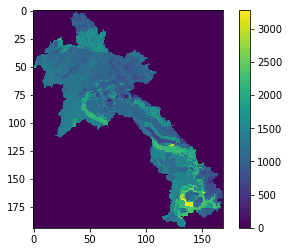

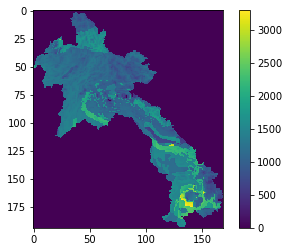

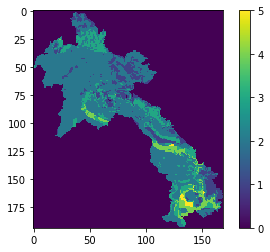

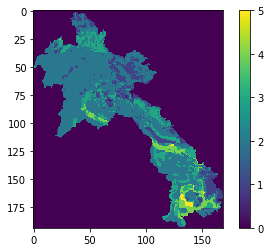

In [6]:
'''visualize result'''

plt.imshow(yield_map_rain_m4)
plt.colorbar()
plt.show()

plt.imshow(yield_map_irr_m4)
plt.colorbar()
plt.show()

plt.imshow(yield_map_rain_class_m4)
plt.colorbar()
plt.show()

plt.imshow(yield_map_irr_class_m4)
plt.colorbar()
plt.show()

In [7]:
'''save result'''

obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB4/CropSuitability_rain_m4.tif', yield_map_rain_m4)
obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB4/CropSuitability_irr_m4.tif', yield_map_irr_m4)

obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB4/CropSuitability_rain_class_m4.tif',yield_map_rain_class_m4)
obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB4/CropSuitability_irr_class_m4.tif',yield_map_irr_class_m4)